In [1]:
# %% Cell 1 - Imports et configuration
import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12


In [2]:
# %% Cell 2 - Conversion format pour FP-Growth
print("=" * 50)
print("CONVERSION FORMAT POUR FP-GROWTH")
print("=" * 50)

def convert_to_fpgrowth_format():
    """Convertit BMS1 en format transactions pour FP-Growth"""
    
    print("🔄 Conversion en format transactions...")
    
    transactions = []
    all_items = []
    
    with open("BMS1.txt", 'r') as f:
        for line_num, line in enumerate(f):
            line = line.strip()
            if line:
                # Pour FP-Growth, on garde tous les items d'une séquence comme une transaction
                items = [item for item in line.split() if item not in ['-1', '-2']]
                if items:
                    transactions.append(items)
                    all_items.extend(items)
    
    print(f"✅ Conversion terminée:")
    print(f"   • Transactions: {len(transactions):,}")
    print(f"   • Items totaux: {len(all_items):,}")
    print(f"   • Items uniques: {len(set(all_items)):,}")
    
    # Sauvegarder en format SPMF
    with open("BMS1_fpgrowth.txt", 'w') as f:
        for transaction in transactions:
            f.write(' '.join(transaction) + '\n')
    
    # Aperçu
    print("\n📄 Aperçu format FP-Growth:")
    with open("BMS1_fpgrowth.txt", 'r') as f:
        for i in range(3):
            line = f.readline().strip()
            print(f"   {i+1}. {line}")
    
    return transactions, all_items

# Exécuter la conversion
transactions, all_items = convert_to_fpgrowth_format()

CONVERSION FORMAT POUR FP-GROWTH
🔄 Conversion en format transactions...
✅ Conversion terminée:
   • Transactions: 15
   • Items totaux: 33
   • Items uniques: 6

📄 Aperçu format FP-Growth:
   1. laptop souris clavier
   2. souris tapis
   3. clavier écran laptop


In [3]:
# %% Cell 3 - Analyse exploratoire des transactions
print("=" * 50)
print("ANALYSE EXPLORATOIRE DES TRANSACTIONS")
print("=" * 50)

def analyze_transactions(transactions, all_items):
    """Analyse statistique des transactions"""
    
    print("📊 Analyse des transactions...")
    
    transaction_lengths = [len(trans) for trans in transactions]
    
    print(f"📈 Statistiques:")
    print(f"   • Nombre de transactions: {len(transactions):,}")
    print(f"   • Nombre total d'items: {len(all_items):,}")
    print(f"   • Items uniques: {len(set(all_items)):,}")
    print(f"   • Taille moyenne transaction: {np.mean(transaction_lengths):.2f} items")
    print(f"   • Taille médiane transaction: {np.median(transaction_lengths):.2f} items")
    print(f"   • Taille max transaction: {np.max(transaction_lengths)} items")
    print(f"   • Taille min transaction: {np.min(transaction_lengths)} items")
    
    # Top 20 items
    item_counts = Counter(all_items)
    top_items = item_counts.most_common(20)
    
    print(f"\n🏆 Top 20 items les plus fréquents:")
    for i, (item, count) in enumerate(top_items, 1):
        percentage = (count / len(transactions)) * 100
        print(f"   {i:2d}. Item {item}: {count:>5} transactions ({percentage:5.2f}%)")
    
    return transaction_lengths, item_counts

# Analyse
transaction_lengths, item_counts = analyze_transactions(transactions, all_items)

ANALYSE EXPLORATOIRE DES TRANSACTIONS
📊 Analyse des transactions...
📈 Statistiques:
   • Nombre de transactions: 15
   • Nombre total d'items: 33
   • Items uniques: 6
   • Taille moyenne transaction: 2.20 items
   • Taille médiane transaction: 2.00 items
   • Taille max transaction: 4 items
   • Taille min transaction: 1 items

🏆 Top 20 items les plus fréquents:
    1. Item souris:     8 transactions (53.33%)
    2. Item clavier:     8 transactions (53.33%)
    3. Item laptop:     7 transactions (46.67%)
    4. Item écran:     5 transactions (33.33%)
    5. Item tapis:     3 transactions (20.00%)
    6. Item sac:     2 transactions (13.33%)


In [5]:
# %% Cell 2b - Conversion avec mapping numérique
print("=" * 50)
print("CONVERSION AVEC MAPPING NUMÉRIQUE")
print("=" * 50)

def convert_with_numeric_mapping():
    """Convertit BMS1 avec mapping texte → numérique"""
    
    print("🔄 Création mapping texte → numérique...")
    
    # Lire tous les items uniques et créer un mapping
    all_items = set()
    
    with open("BMS1.txt", 'r') as f:
        for line in f:
            items = line.strip().split()
            for item in items:
                if item not in ['-1', '-2']:
                    all_items.add(item)
    
    # Créer mapping (item → ID numérique)
    item_to_id = {item: str(i+1) for i, item in enumerate(sorted(all_items))}
    
    print(f"✅ Mapping créé: {len(item_to_id)} items uniques")
    
    # Convertir avec IDs numériques
    transactions_count = 0
    with open("BMS1.txt", 'r') as fin, open("BMS1_fpgrowth_numeric.txt", 'w') as fout:
        for line in fin:
            items = line.strip().split()
            numeric_items = [item_to_id[item] for item in items if item not in ['-1', '-2']]
            if numeric_items:
                fout.write(' '.join(numeric_items) + '\n')
                transactions_count += 1
    
    print(f"✅ Fichier converti: {transactions_count} transactions")
    
    # Sauvegarder le mapping pour référence
    with open("item_mapping.txt", 'w') as f:
        for item, item_id in item_to_id.items():
            f.write(f"{item_id}: {item}\n")
    
    print("📁 Mapping sauvegardé: item_mapping.txt")
    
    # Aperçu
    print("\n📄 Aperçu format numérique:")
    with open("BMS1_fpgrowth_numeric.txt", 'r') as f:
        for i in range(3):
            line = f.readline().strip()
            print(f"   {i+1}. {line}")
    
    return "BMS1_fpgrowth_numeric.txt"

# Exécuter la conversion numérique
numeric_file = convert_with_numeric_mapping()

CONVERSION AVEC MAPPING NUMÉRIQUE
🔄 Création mapping texte → numérique...
✅ Mapping créé: 6 items uniques
✅ Fichier converti: 15 transactions
📁 Mapping sauvegardé: item_mapping.txt

📄 Aperçu format numérique:
   1. 2 4 1
   2. 4 5
   3. 1 6 2


In [9]:
# %% Cell 4 - Exécution FP-Growth
print("=" * 50)
print("EXÉCUTION ALGORITHME FP-GROWTH")
print("=" * 50)

def run_fpgrowth():
    """Exécute FP-Growth via SPMF"""
    
    # Vérifications
    if not os.path.exists("spmf.jar"):
        print("❌ Fichier spmf.jar non trouvé!")
        print("💡 Téléchargez depuis: https://www.philippe-fournier-viger.com/spmf/")
        return False, 0
    
    if not os.path.exists("BMS1_fpgrowth_numeric.txt"):
        print("❌ Fichier BMS1_fpgrowth.txt non trouvé")
        return False, 0
    
    # Paramètres FP-Growth
    min_support = 0.1        # Support minimal (0.1%)
    max_itemset_length = 10    # Longueur max des itemsets
    
    print("🚀 Lancement FP-Growth...")
    print(f"   • Support: {min_support} (0.1%)")
    print(f"   • Longueur max itemsets: {max_itemset_length}")
    
    command = [
        'java', '-jar', 'spmf.jar', 'run', 
        'FPGrowth_itemsets',                    # Algorithme FP-Growth
        'BMS1_fpgrowth_numeric.txt',           # Fichier transactions
        'output_fpgrowth.txt',         # Fichier sortie
        str(min_support),              # Support minimal
        str(max_itemset_length)        # Longueur max itemsets
    ]
    
    try:
        print("⏳ Exécution en cours...")
        result = subprocess.run(command, capture_output=True, text=True, timeout=300)
        
        print(f"📊 Code retour: {result.returncode}")
        
        # Afficher la sortie
        if result.stdout:
            print("📄 Sortie SPMF:")
            for line in result.stdout.split('\n'):
                if line.strip():
                    print(f"   {line}")
        
        if result.returncode == 0:
            if os.path.exists('output_fpgrowth.txt'):
                file_size = os.path.getsize('output_fpgrowth.txt')
                if file_size > 0:
                    with open('output_fpgrowth.txt', 'r') as f:
                        lines = f.readlines()
                    
                    print(f"✅ FP-Growth RÉUSSITE!")
                    print(f"   • Itemsets fréquents trouvés: {len(lines):,}")
                    print(f"   • Taille fichier: {file_size} octets")
                    
                    # Aperçu des résultats
                    print(f"   • Top 10 itemsets:")
                    for i, line in enumerate(lines[:10]):
                        print(f"      {i+1}. {line.strip()}")
                    
                    return True, len(lines)
                else:
                    print("❌ Fichier vide - support trop élevé")
                    return False, 0
            else:
                print("❌ Fichier de sortie non créé")
                return False, 0
        else:
            print(f"❌ Erreur d'exécution")
            if result.stderr:
                print(f"   Détails: {result.stderr}")
            return False, 0
            
    except subprocess.TimeoutExpired:
        print("⏰ Timeout - L'exécution a pris trop de temps")
        return False, 0
    except Exception as e:
        print(f"💥 Exception: {e}")
        return False, 0

# Exécuter FP-Growth
fpgrowth_success, itemset_count = run_fpgrowth()

EXÉCUTION ALGORITHME FP-GROWTH
🚀 Lancement FP-Growth...
   • Support: 0.1 (0.1%)
   • Longueur max itemsets: 10
⏳ Exécution en cours...
📊 Code retour: 0
📄 Sortie SPMF:
   >/home/mlee/Documents/semestre1/INF4117/TP/Annalyse_exploratrice_Wine/Extraction_des_regles/FP-Growth/spmf.jar
   =============  FP-GROWTH 2.42 - STATS =============
    Transactions count from database : 15
    Max memory usage: 10.969482421875 mb 
    Frequent itemsets count : 17
    Total time ~ 6 ms
✅ FP-Growth RÉUSSITE!
   • Itemsets fréquents trouvés: 17
   • Taille fichier: 196 octets
   • Top 10 itemsets:
      1. 3 #SUP: 2
      2. 2 3 #SUP: 2
      3. 5 #SUP: 3
      4. 4 5 #SUP: 2
      5. 1 5 #SUP: 2
      6. 6 #SUP: 5
      7. 4 6 #SUP: 2
      8. 2 6 #SUP: 3
      9. 1 2 6 #SUP: 2
      10. 1 6 #SUP: 3


In [10]:
# %% Cell 5 - Tests avec différents supports
print("=" * 50)
print("TESTS AVEC DIFFÉRENTS SUPPORTS")
print("=" * 50)

def test_different_supports():
    """Test FP-Growth avec différents supports"""
    
    supports_to_try = [0.01, 0.005, 0.001, 0.0005]
    
    for support in supports_to_try:
        print(f"\n🔧 Test avec support: {support}")
        
        command = [
            'java', '-jar', 'spmf.jar', 'run', 
            'FPGrowth',
            'BMS1_fpgrowth.txt',
            f'output_fpgrowth_{support}.txt',
            str(support),
            '10'
        ]
        
        try:
            result = subprocess.run(command, capture_output=True, text=True, timeout=180)
            print(f"   Code retour: {result.returncode}")
            
            output_file = f'output_fpgrowth_{support}.txt'
            if result.returncode == 0 and os.path.exists(output_file):
                size = os.path.getsize(output_file)
                if size > 0:
                    with open(output_file, 'r') as f:
                        lines = f.readlines()
                    
                    print(f"   ✅ SUCCÈS: {len(lines):,} itemsets")
                    
                    # Utiliser ce fichier comme résultat principal
                    if not fpgrowth_success:
                        !cp "{output_file}" "output_fpgrowth.txt"
                        print(f"   📁 Fichier principal mis à jour")
                        return True, len(lines)
                else:
                    print("   ❌ Fichier vide")
            else:
                print("   ❌ Échec")
                
        except Exception as e:
            print(f"   💥 Erreur: {e}")
    
    return False, 0

# Si premier essai échoue, tester d'autres supports
if not fpgrowth_success:
    print("🔄 Essai avec différents supports...")
    alt_success, itemset_count = test_different_supports()
    if alt_success:
        fpgrowth_success = True

TESTS AVEC DIFFÉRENTS SUPPORTS


In [11]:
# %% Cell 6 - Analyse des résultats FP-Growth
print("=" * 50)
print("ANALYSE DES RÉSULTATS FP-GROWTH")
print("=" * 50)

def analyze_fpgrowth_results():
    """Analyse détaillée des itemsets fréquents trouvés"""
    
    if not os.path.exists('output_fpgrowth.txt'):
        print("❌ Fichier résultats non trouvé")
        return
    
    file_size = os.path.getsize('output_fpgrowth.txt')
    if file_size == 0:
        print("❌ Fichier résultats vide")
        return
    
    print("📊 Analyse des itemsets fréquents...")
    
    itemsets = []
    supports = []
    itemset_lengths = []
    
    with open('output_fpgrowth.txt', 'r') as f:
        for line in f:
            line = line.strip()
            if line and '#SUP:' in line:
                # Format: itemset #SUP: support
                itemset_part, sup_part = line.rsplit('#SUP:', 1)
                itemset = itemset_part.strip()
                support = int(sup_part.strip())
                
                itemsets.append(itemset)
                supports.append(support)
                
                # Calculer la longueur de l'itemset
                items = itemset.split()
                itemset_lengths.append(len(items))
    
    if not itemsets:
        print("❌ Aucun itemset trouvé dans le fichier")
        return
    
    print(f"✅ Données chargées: {len(itemsets):,} itemsets fréquents")
    
    # Statistiques générales
    print(f"\n📈 Statistiques:")
    print(f"   • Support moyen: {np.mean(supports):.1f}")
    print(f"   • Support médian: {np.median(supports):.1f}")
    print(f"   • Support maximum: {np.max(supports)}")
    print(f"   • Support minimum: {np.min(supports)}")
    print(f"   • Longueur moyenne itemset: {np.mean(itemset_lengths):.2f} items")
    print(f"   • Longueur max itemset: {np.max(itemset_lengths)} items")
    
    # Top 15 itemsets par support
    print(f"\n🏆 Top 15 itemsets par support:")
    sorted_itemsets = sorted(zip(itemsets, supports, itemset_lengths), 
                           key=lambda x: x[1], reverse=True)
    
    for i, (itemset, support, length) in enumerate(sorted_itemsets[:15], 1):
        percentage = (support / len(transactions)) * 100
        print(f"   {i:2d}. Support: {support:>5} ({percentage:5.2f}%) | Taille: {length} | {itemset}")
    
    # Distribution des longueurs
    print(f"\n📏 Distribution des longueurs d'itemsets:")
    length_dist = Counter(itemset_lengths)
    for length, count in sorted(length_dist.items()):
        percentage = (count / len(itemsets)) * 100
        print(f"   • {length} item(s): {count:>5} itemsets ({percentage:5.1f}%)")
    
    return itemsets, supports, itemset_lengths

# Analyser les résultats
if fpgrowth_success:
    itemsets, supports, itemset_lengths = analyze_fpgrowth_results()
else:
    print("❌ Impossible d'analyser - FP-Growth a échoué")

ANALYSE DES RÉSULTATS FP-GROWTH
📊 Analyse des itemsets fréquents...
✅ Données chargées: 17 itemsets fréquents

📈 Statistiques:
   • Support moyen: 3.6
   • Support médian: 3.0
   • Support maximum: 8
   • Support minimum: 2
   • Longueur moyenne itemset: 1.76 items
   • Longueur max itemset: 3 items

🏆 Top 15 itemsets par support:
    1. Support:     8 (53.33%) | Taille: 1 | 4
    2. Support:     8 (53.33%) | Taille: 1 | 1
    3. Support:     7 (46.67%) | Taille: 1 | 2
    4. Support:     5 (33.33%) | Taille: 1 | 6
    5. Support:     4 (26.67%) | Taille: 2 | 1 4
    6. Support:     3 (20.00%) | Taille: 1 | 5
    7. Support:     3 (20.00%) | Taille: 2 | 2 6
    8. Support:     3 (20.00%) | Taille: 2 | 1 6
    9. Support:     3 (20.00%) | Taille: 2 | 2 4
   10. Support:     3 (20.00%) | Taille: 2 | 1 2
   11. Support:     2 (13.33%) | Taille: 1 | 3
   12. Support:     2 (13.33%) | Taille: 2 | 2 3
   13. Support:     2 (13.33%) | Taille: 2 | 4 5
   14. Support:     2 (13.33%) | Taille: 2

VISUALISATIONS DES RÉSULTATS
📈 Génération des graphiques...


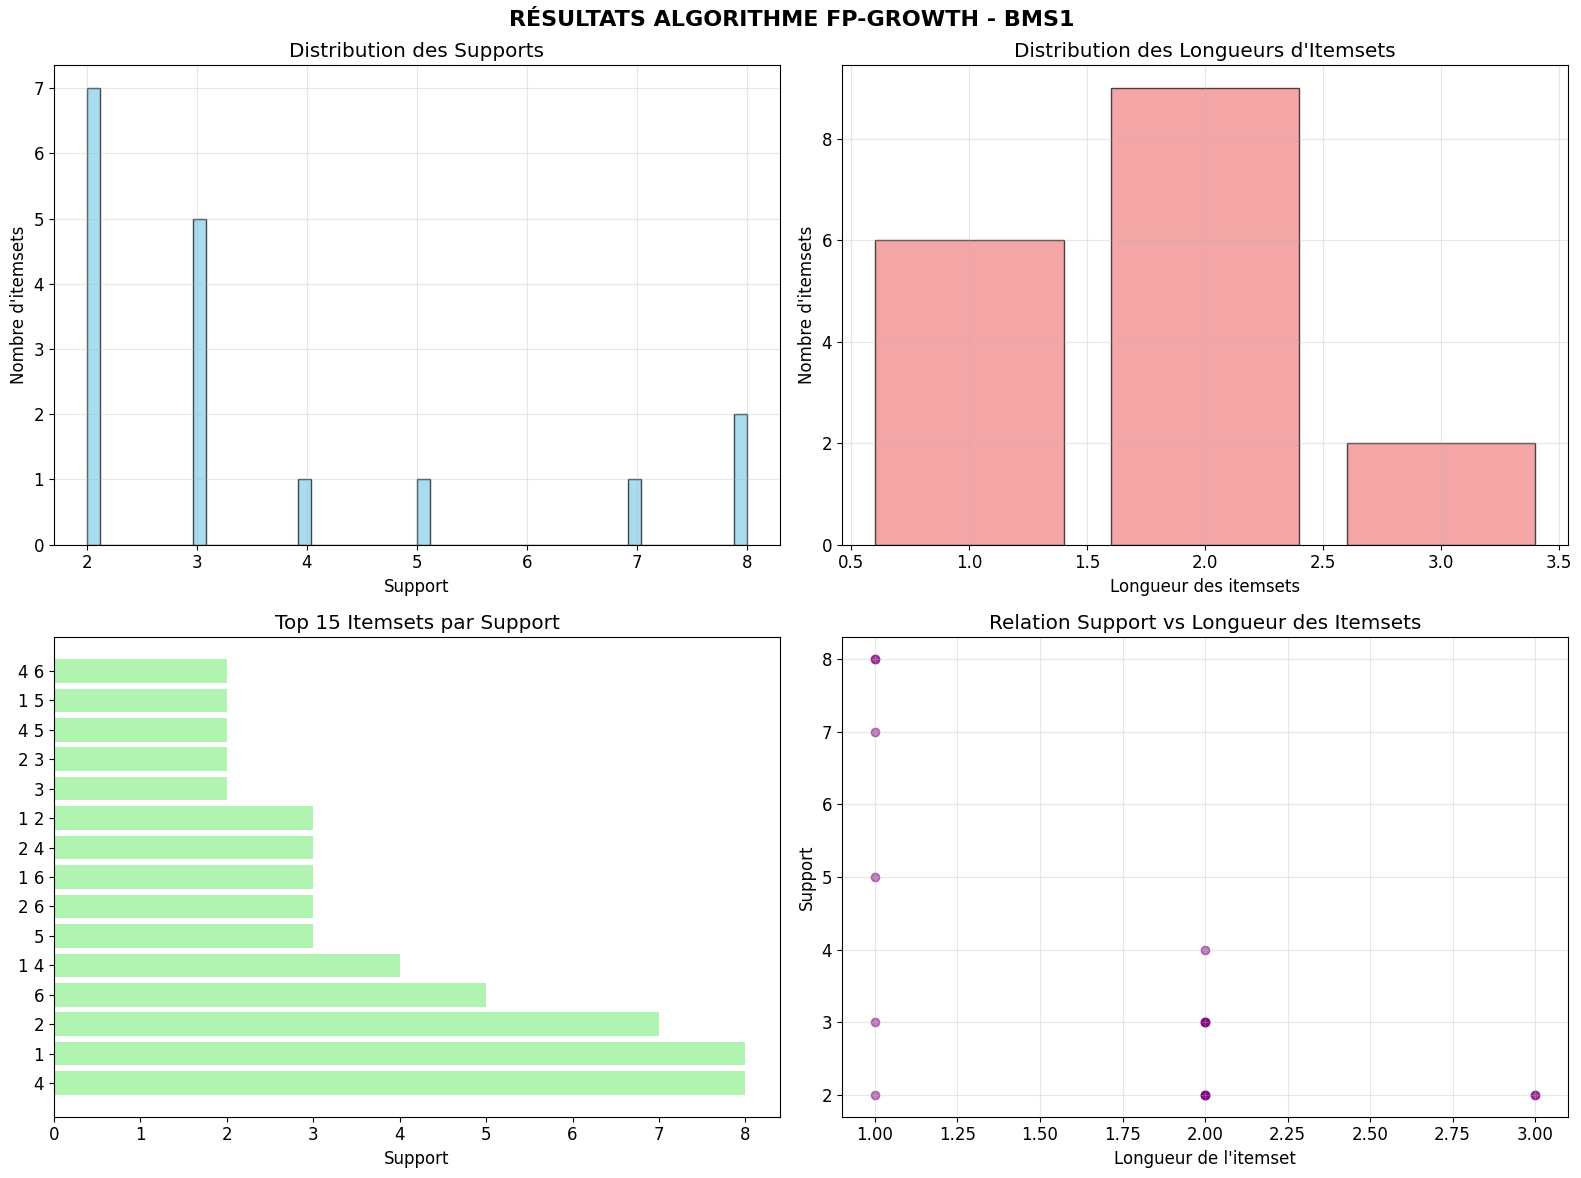

✅ Graphiques générés et sauvegardés!


In [12]:
# %% Cell 7 - Visualisations des résultats
print("=" * 50)
print("VISUALISATIONS DES RÉSULTATS")
print("=" * 50)

def create_fpgrowth_visualizations(itemsets, supports, itemset_lengths):
    """Crée des visualisations pour les résultats FP-Growth"""
    
    if not itemsets:
        print("❌ Aucune donnée à visualiser")
        return
    
    print("📈 Génération des graphiques...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('RÉSULTATS ALGORITHME FP-GROWTH - BMS1', fontsize=16, fontweight='bold')
    
    # Graphique 1: Distribution des supports
    axes[0,0].hist(supports, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_xlabel('Support')
    axes[0,0].set_ylabel('Nombre d\'itemsets')
    axes[0,0].set_title('Distribution des Supports')
    axes[0,0].grid(True, alpha=0.3)
    
    # Graphique 2: Distribution des longueurs d'itemsets
    length_counts = Counter(itemset_lengths)
    axes[0,1].bar(length_counts.keys(), length_counts.values(), 
                 color='lightcoral', alpha=0.7, edgecolor='black')
    axes[0,1].set_xlabel('Longueur des itemsets')
    axes[0,1].set_ylabel('Nombre d\'itemsets')
    axes[0,1].set_title('Distribution des Longueurs d\'Itemsets')
    axes[0,1].grid(True, alpha=0.3)
    
    # Graphique 3: Top 15 itemsets par support
    top_15 = sorted(zip(itemsets, supports), key=lambda x: x[1], reverse=True)[:15]
    top_itemsets, top_supports = zip(*top_15)
    
    # Tronquer les longs itemsets pour l'affichage
    truncated_itemsets = [itemset[:40] + '...' if len(itemset) > 40 else itemset 
                         for itemset in top_itemsets]
    
    y_pos = np.arange(len(truncated_itemsets))
    axes[1,0].barh(y_pos, top_supports, color='lightgreen', alpha=0.7)
    axes[1,0].set_yticks(y_pos)
    axes[1,0].set_yticklabels(truncated_itemsets)
    axes[1,0].set_xlabel('Support')
    axes[1,0].set_title('Top 15 Itemsets par Support')
    
    # Graphique 4: Relation support vs longueur
    axes[1,1].scatter(itemset_lengths, supports, alpha=0.5, color='purple')
    axes[1,1].set_xlabel('Longueur de l\'itemset')
    axes[1,1].set_ylabel('Support')
    axes[1,1].set_title('Relation Support vs Longueur des Itemsets')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('resultats_fpgrowth.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Graphiques générés et sauvegardés!")

# Créer les visualisations
if fpgrowth_success and 'itemsets' in locals():
    create_fpgrowth_visualizations(itemsets, supports, itemset_lengths)
else:
    print("❌ Données insuffisantes pour les visualisations")

In [13]:
# %% Cell 8 - Résumé et insights
print("=" * 50)
print("SYNTHÈSE ET INSIGHTS")
print("=" * 50)

if fpgrowth_success:
    print("🎉 FP-GROWTH TERMINÉ AVEC SUCCÈS!")
    print(f"📊 {len(itemsets):,} itemsets fréquents trouvés")
    
    # Insights business
    print(f"\n💡 INSIGHTS BUSINESS:")
    
    # Itemsets de taille 1 (items individuels)
    single_items = [(itemset, sup) for itemset, sup, length in 
                   zip(itemsets, supports, itemset_lengths) if length == 1]
    
    if single_items:
        top_single = sorted(single_items, key=lambda x: x[1], reverse=True)[:5]
        print(f"   • Top 5 items individuels:")
        for i, (item, sup) in enumerate(top_single, 1):
            perc = (sup / len(transactions)) * 100
            print(f"      {i}. {item} ({sup} transactions, {perc:.1f}%)")
    
    # Itemsets de taille 2+ (associations)
    multi_items = [(itemset, sup, length) for itemset, sup, length in 
                  zip(itemsets, supports, itemset_lengths) if length >= 2]
    
    if multi_items:
        top_multi = sorted(multi_items, key=lambda x: x[1], reverse=True)[:5]
        print(f"   • Top 5 associations (taille ≥ 2):")
        for i, (itemset, sup, length) in enumerate(top_multi, 1):
            perc = (sup / len(transactions)) * 100
            print(f"      {i}. {itemset} (support: {sup}, {perc:.1f}%)")
    
    # Itemsets les plus longs
    if itemset_lengths:
        max_len = max(itemset_lengths)
        longest_itemsets = [(itemset, sup) for itemset, sup, length in 
                           zip(itemsets, supports, itemset_lengths) if length == max_len]
        if longest_itemsets:
            print(f"   • Itemsets les plus longs ({max_len} items):")
            for i, (itemset, sup) in enumerate(longest_itemsets[:3], 1):
                print(f"      {i}. {itemset} (support: {sup})")
    
else:
    print("❌ FP-Growth n'a pas fonctionné")
    print("💡 Suggestions:")
    print("   • Vérifiez que spmf.jar est dans le dossier")
    print("   • Essayez avec un support plus élevé (0.01)")
    print("   • Vérifiez le format du fichier BMS1_fpgrowth.txt")

print("\n" + "="*80)
print("FIN DE L'ANALYSE FP-GROWTH")
print("="*80)

SYNTHÈSE ET INSIGHTS
🎉 FP-GROWTH TERMINÉ AVEC SUCCÈS!
📊 17 itemsets fréquents trouvés

💡 INSIGHTS BUSINESS:
   • Top 5 items individuels:
      1. 4 (8 transactions, 53.3%)
      2. 1 (8 transactions, 53.3%)
      3. 2 (7 transactions, 46.7%)
      4. 6 (5 transactions, 33.3%)
      5. 5 (3 transactions, 20.0%)
   • Top 5 associations (taille ≥ 2):
      1. 1 4 (support: 4, 26.7%)
      2. 2 6 (support: 3, 20.0%)
      3. 1 6 (support: 3, 20.0%)
      4. 2 4 (support: 3, 20.0%)
      5. 1 2 (support: 3, 20.0%)
   • Itemsets les plus longs (3 items):
      1. 1 2 6 (support: 2)
      2. 1 2 4 (support: 2)

FIN DE L'ANALYSE FP-GROWTH


In [15]:
# %% Cell 8 - Résumé et insights AVEC NOMS CATÉGORIELS
print("=" * 50)
print("SYNTHÈSE ET INSIGHTS - AVEC NOMS CATÉGORIELS")
print("=" * 50)

def load_item_mapping():
    """Charge le mapping ID → nom d'item"""
    item_mapping = {}
    if os.path.exists("item_mapping.txt"):
        with open("item_mapping.txt", 'r') as f:
            for line in f:
                if ':' in line:
                    item_id, item_name = line.strip().split(':', 1)
                    item_mapping[item_id.strip()] = item_name.strip()
        print(f"✅ Mapping chargé: {len(item_mapping)} items")
    else:
        print("⚠️  Fichier item_mapping.txt non trouvé")
    return item_mapping

def convert_to_category_names(itemset, item_mapping):
    """Convertit un itemset d'IDs en noms catégoriels"""
    items = itemset.split()
    category_names = [item_mapping.get(item, f"Item_{item}") for item in items]
    return " ".join(category_names)

if fpgrowth_success:
    # Charger le mapping
    item_mapping = load_item_mapping()
    
    print("🎉 FP-GROWTH TERMINÉ AVEC SUCCÈS!")
    print(f"📊 {len(itemsets):,} itemsets fréquents trouvés")
    
    # Insights business avec noms catégoriels
    print(f"\n💡 INSIGHTS BUSINESS (avec noms réels):")
    
    # Itemsets de taille 1 (items individuels)
    single_items = [(itemset, sup) for itemset, sup, length in 
                   zip(itemsets, supports, itemset_lengths) if length == 1]
    
    if single_items:
        top_single = sorted(single_items, key=lambda x: x[1], reverse=True)[:5]
        print(f"   • Top 5 PRODUITS les plus populaires:")
        for i, (item, sup) in enumerate(top_single, 1):
            item_name = convert_to_category_names(item, item_mapping)
            perc = (sup / len(transactions)) * 100
            print(f"      {i}. {item_name} ({sup} transactions, {perc:.1f}%)")
    
    # Itemsets de taille 2+ (associations)
    multi_items = [(itemset, sup, length) for itemset, sup, length in 
                  zip(itemsets, supports, itemset_lengths) if length >= 2]
    
    if multi_items:
        top_multi = sorted(multi_items, key=lambda x: x[1], reverse=True)[:5]
        print(f"   • Top 5 ASSOCIATIONS les plus fréquentes:")
        for i, (itemset, sup, length) in enumerate(top_multi, 1):
            itemset_names = convert_to_category_names(itemset, item_mapping)
            perc = (sup / len(transactions)) * 100
            print(f"      {i}. {itemset_names} (support: {sup}, {perc:.1f}%)")
    
    # Itemsets de taille 2 spécifiquement (paires)
    pairs = [(itemset, sup) for itemset, sup, length in 
            zip(itemsets, supports, itemset_lengths) if length == 2]
    
    if pairs:
        top_pairs = sorted(pairs, key=lambda x: x[1], reverse=True)[:3]
        print(f"   • Top 3 PAIRES de produits achetés ensemble:")
        for i, (itemset, sup) in enumerate(top_pairs, 1):
            itemset_names = convert_to_category_names(itemset, item_mapping)
            perc = (sup / len(transactions)) * 100
            print(f"      {i}. {itemset_names} ({sup} transactions, {perc:.1f}%)")
    
    # Itemsets les plus longs (ensembles complexes)
    if itemset_lengths:
        max_len = max(itemset_lengths)
        longest_itemsets = [(itemset, sup) for itemset, sup, length in 
                           zip(itemsets, supports, itemset_lengths) if length == max_len]
        if longest_itemsets:
            print(f"   • ENSEMBLES les plus complexes ({max_len} produits):")
            for i, (itemset, sup) in enumerate(longest_itemsets[:3], 1):
                itemset_names = convert_to_category_names(itemset, item_mapping)
                print(f"      {i}. {itemset_names} (support: {sup})")
    
    # Analyse par catégorie de produits
    print(f"\n📈 ANALYSE PAR CATÉGORIE DE PRODUITS:")
    
    # Compter combien de fois chaque produit apparaît dans les itemsets
    product_frequency = {}
    for itemset in itemsets:
        items = itemset.split()
        for item in items:
            product_name = item_mapping.get(item, f"Item_{item}")
            product_frequency[product_name] = product_frequency.get(product_name, 0) + 1
    
    if product_frequency:
        top_products = sorted(product_frequency.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"   • Produits les plus présents dans les associations:")
        for i, (product, freq) in enumerate(top_products, 1):
            percentage = (freq / len(itemsets)) * 100
            print(f"      {i}. {product} ({freq} associations, {percentage:.1f}%)")
    """
    # Recommandations business
    print(f"\n🚀 RECOMMANDATIONS STRATÉGIQUES:")
    
    if multi_items:
        best_association = sorted(multi_items, key=lambda x: x[1], reverse=True)[0]
        best_itemset_names = convert_to_category_names(best_association[0], item_mapping)
        print(f"   • CRÉER UN BUNDLE: '{best_itemset_names}'")
        print(f"     (Apparaît dans {best_association[1]} transactions)")
    
    if pairs:
        best_pair = sorted(pairs, key=lambda x: x[1], reverse=True)[0]
        best_pair_names = convert_to_category_names(best_pair[0], item_mapping)
        item1, item2 = best_pair_names.split()
        print(f"   • CROSS-SELLING: Recommander '{item2}' aux acheteurs de '{item1}'")
        print(f"     (Achetés ensemble dans {best_pair[1]} transactions)")
    
    if single_items:
        most_popular = sorted(single_items, key=lambda x: x[1], reverse=True)[0]
        popular_name = convert_to_category_names(most_popular[0], item_mapping)
        print(f"   • PRODUIT PHARE: '{popular_name}'")
        print(f"     (Acheté dans {most_popular[1]} transactions)")
    """
else:
    print("❌ FP-Growth n'a pas fonctionné")
    print("💡 Suggestions:")
    print("   • Vérifiez que spmf.jar est dans le dossier")
    print("   • Essayez avec un support plus élevé (0.01)")
    print("   • Vérifiez le format du fichier BMS1_fpgrowth.txt")

print("\n" + "="*80)
print("FIN DE L'ANALYSE FP-GROWTH - AVEC NOMS CATÉGORIELS")
print("="*80)

SYNTHÈSE ET INSIGHTS - AVEC NOMS CATÉGORIELS
✅ Mapping chargé: 6 items
🎉 FP-GROWTH TERMINÉ AVEC SUCCÈS!
📊 17 itemsets fréquents trouvés

💡 INSIGHTS BUSINESS (avec noms réels):
   • Top 5 PRODUITS les plus populaires:
      1. souris (8 transactions, 53.3%)
      2. clavier (8 transactions, 53.3%)
      3. laptop (7 transactions, 46.7%)
      4. écran (5 transactions, 33.3%)
      5. tapis (3 transactions, 20.0%)
   • Top 5 ASSOCIATIONS les plus fréquentes:
      1. clavier souris (support: 4, 26.7%)
      2. laptop écran (support: 3, 20.0%)
      3. clavier écran (support: 3, 20.0%)
      4. laptop souris (support: 3, 20.0%)
      5. clavier laptop (support: 3, 20.0%)
   • Top 3 PAIRES de produits achetés ensemble:
      1. clavier souris (4 transactions, 26.7%)
      2. laptop écran (3 transactions, 20.0%)
      3. clavier écran (3 transactions, 20.0%)
   • ENSEMBLES les plus complexes (3 produits):
      1. clavier laptop écran (support: 2)
      2. clavier laptop souris (support: 2)